## Préparation des données

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import time
import datetime

In [2]:
df_comments = pd.read_csv('D:\python\dataComment.csv')
df_comments.tail()

,index,commentaires
18082,285,"L'appartement est bien situé dans Paris, de pl..."
18083,285,"Appartement bien situé, propre et bien équipé...."
18084,285,"Excellent accueil, convivial et chaleureux. Em..."
18085,285,"Beautiful, clean and cozy apartment with a lit..."
18086,285,"Extremely responsive, kind host, and a lovely ..."


In [3]:
df_listings = pd.read_csv('D:\python\dataListings.csv')
df_listings.tail()

,Unnamed: 0,title,link,nbComments,prix,topRow,evaluation,roomInfo
280,15,For a Charming stay in Paris - null - Paris,http://airbnb.com/rooms/35187319?adults=1&chec...,(32),Previous price:$154Discounted price:$94 / night,Hotel room in Saint-Germain-des-Prés - Odéon,4.06,2 guests · 1 bedroom · 1 bed · 1 bath
281,16,Fabulous family apartment in the centre of Par...,http://airbnb.com/rooms/31132880?adults=1&chec...,(138),Price:$427 / night,Entire apartment in II Arrondissement,4.71,8 guests · 3 bedrooms · 4 beds · 1.5 baths
282,17,Studio au Cœur de Paris - null - Paris,http://airbnb.com/rooms/43948160?adults=1&chec...,(32),Price:$88 / night,Entire apartment in I Arrondissement,4.31,2 guests · Studio · 1 bed · 1 bath
283,18,chambre calme maison examen Laplace - null - A...,http://airbnb.com/rooms/8351562?adults=1&check...,(300),Price:$57 / night,Private room in XIV Arrondissement,4.69,2 guests · 1 bedroom · 1 bed · 1 shared bath
284,19,Amazing appartment on the Canal - null - Paris,http://airbnb.com/rooms/37064479?adults=1&chec...,(8),Price:$95 / night,Entire apartment in X Arrondissement,4.75,3 guests · 1 bedroom · 2 beds · 1 bath


Dimensions et valeurs dupliquées

In [4]:
print("La base des commentaires {} rows et {} columns.".format(*df_comments.shape))
print("On compte {} duplicates.".format(df_comments.duplicated().sum()))

La base des commentaires 18087 rows et 2 columns.
On compte 52 duplicates.


In [5]:
print("La base des listings {} rows et {} columns.".format(*df_listings.shape))
print("On compte {} duplicates.".format(df_listings.duplicated().sum()))

La base des listings 285 rows et 8 columns.
On compte 0 duplicates.


In [7]:
df_comments[df_comments.duplicated()]

,index,commentaires
296,7,Bien
366,7,Je recommande
380,7,Super séjour
406,7,Bon séjour
453,7,Super
1626,15,Très bon hôtel
1686,15,Très bien
1761,15,Top
1789,15,.
1974,19,Parfait


In [97]:
#df_listings.head()

In [6]:

df_listings.insert(0, 'ID_listings', range(1,len(df_listings)+1))
df_listings.tail()

,ID_listings,Unnamed: 0,title,link,nbComments,prix,topRow,evaluation,roomInfo
280,281,15,For a Charming stay in Paris - null - Paris,http://airbnb.com/rooms/35187319?adults=1&chec...,(32),Previous price:$154Discounted price:$94 / night,Hotel room in Saint-Germain-des-Prés - Odéon,4.06,2 guests · 1 bedroom · 1 bed · 1 bath
281,282,16,Fabulous family apartment in the centre of Par...,http://airbnb.com/rooms/31132880?adults=1&chec...,(138),Price:$427 / night,Entire apartment in II Arrondissement,4.71,8 guests · 3 bedrooms · 4 beds · 1.5 baths
282,283,17,Studio au Cœur de Paris - null - Paris,http://airbnb.com/rooms/43948160?adults=1&chec...,(32),Price:$88 / night,Entire apartment in I Arrondissement,4.31,2 guests · Studio · 1 bed · 1 bath
283,284,18,chambre calme maison examen Laplace - null - A...,http://airbnb.com/rooms/8351562?adults=1&check...,(300),Price:$57 / night,Private room in XIV Arrondissement,4.69,2 guests · 1 bedroom · 1 bed · 1 shared bath
284,285,19,Amazing appartment on the Canal - null - Paris,http://airbnb.com/rooms/37064479?adults=1&chec...,(8),Price:$95 / night,Entire apartment in X Arrondissement,4.75,3 guests · 1 bedroom · 2 beds · 1 bath


In [7]:
df_listings = df_listings.set_index('ID_listings')

In [11]:
df_listings.tail()

,Unnamed: 0,title,link,nbComments,prix,topRow,evaluation,roomInfo
ID_listings,,,,,,,,
281,15,For a Charming stay in Paris - null - Paris,http://airbnb.com/rooms/35187319?adults=1&chec...,(32),Previous price:$154Discounted price:$94 / night,Hotel room in Saint-Germain-des-Prés - Odéon,4.06,2 guests · 1 bedroom · 1 bed · 1 bath
282,16,Fabulous family apartment in the centre of Par...,http://airbnb.com/rooms/31132880?adults=1&chec...,(138),Price:$427 / night,Entire apartment in II Arrondissement,4.71,8 guests · 3 bedrooms · 4 beds · 1.5 baths
283,17,Studio au Cœur de Paris - null - Paris,http://airbnb.com/rooms/43948160?adults=1&chec...,(32),Price:$88 / night,Entire apartment in I Arrondissement,4.31,2 guests · Studio · 1 bed · 1 bath
284,18,chambre calme maison examen Laplace - null - A...,http://airbnb.com/rooms/8351562?adults=1&check...,(300),Price:$57 / night,Private room in XIV Arrondissement,4.69,2 guests · 1 bedroom · 1 bed · 1 shared bath
285,19,Amazing appartment on the Canal - null - Paris,http://airbnb.com/rooms/37064479?adults=1&chec...,(8),Price:$95 / night,Entire apartment in X Arrondissement,4.75,3 guests · 1 bedroom · 2 beds · 1 bath


In [8]:
df_listings.loc[:, "pricepernight"] = df_listings.loc[:, "prix"].str.split("Discounted", n = 0, expand = True)[0].str.replace("$", "/").str.split("/",  n = 0, expand = True)[1]
df_listings.loc[(df_listings.pricepernight==' nuit'), "pricepernight"] = df_listings.loc[:, "prix"].str.split("€Prix", n = 0, expand = True)[0].str.replace(":", "/").str.split("/",  n = 0, expand = True)[1]
df_listings["pricepernight"] = df_listings["pricepernight"].str.strip('€ ')

df_listings['nbComments'] = df_listings['nbComments'].str.replace(r'\D', '')
df_listings.loc[df_listings['nbComments'] ==''] = 0


# on convertit en numeric
df_listings.loc[:, "pricepernight"] = pd.to_numeric(df_listings.pricepernight)
df_listings.loc[:, "nbComments"] = pd.to_numeric(df_listings.nbComments)
df_listings['evaluation'] = df_listings['evaluation'].astype(float)


In [121]:
# on copie pour tester si les codes marchent 
#df = df_listings.copy()

In [9]:
df_listings[10:30]
df_listings.dtypes

Unnamed: 0         int64
title             object
link              object
nbComments         int64
prix              object
topRow            object
evaluation       float64
roomInfo          object
pricepernight      int64
dtype: object


## Fusion des dataframes, traitement et exploration de la nouvelle base

In [10]:
# on fait un left join en ajoutant certaines de la base des listings à celle des commentaires
df = pd.merge(df_comments, df_listings[['title', 'nbComments', 'evaluation',
                          'topRow', 'pricepernight']], 
              left_on='index', right_on='ID_listings', how='left')


In [11]:
#df

In [ ]:
## valeurs manquantes 

In [12]:
df.isna().sum()

index            0
commentaires     3
title            0
nbComments       0
evaluation       0
topRow           0
pricepernight    0
dtype: int64

In [13]:
# 3 commentaires vides , on les supprime
df.dropna(inplace=True)
df.isna().sum()

index            0
commentaires     0
title            0
nbComments       0
evaluation       0
topRow           0
pricepernight    0
dtype: int64

#### Traitement sur les langues

In [15]:
# ! pip install langdetect

  Created wheel for langdetect: filename=langdetect-1.0.8-py3-none-any.whl size=993196 sha256=551910ca0cc329409d09d0be168664cc650f810a206abce850b33777085e86b5
  Stored in directory: c:\users\diagne\appdata\local\pip\cache\wheels\59\f6\9d\85068904dba861c0b9af74e286265a08da438748ee5ae56067
Successfully built langdetect


In [16]:
# on utilise le package langdetect de python 

from langdetect import detect

In [17]:
# fonction qui permet de détecter les langues 

def language_detection(text):
    try:
        return detect(text)
    except:
        return None

In [19]:
%%time
df['language'] = df['commentaires'].apply(language_detection)

Wall time: 2min 53s


In [36]:
df.language.value_counts(ascending = False).head(10)

fr       9602
en       6415
es        569
de        256
ko        197
pt        137
it        128
ca        119
nl        112
zh-cn      94
Name: language, dtype: int64

In [26]:
df[df['language'] =='pt'].head(1)

,index,commentaires,title,nbComments,evaluation,topRow,pricepernight,language
69,2,"Muito boa localização, quarto muito acolhedor....",La Chambre & Piscine - null - Paris,174,4.84,Chambre d'hôtel à Vaugirard,120,pt


In [27]:
df[df['language'] =='ko'].head(1)

,index,commentaires,title,nbComments,evaluation,topRow,pricepernight,language
92,2,위치가 조금 애매하지만 조금만 걸으면 지하철 버스 이용 가능하고 가성비가 너무 좋아...,La Chambre & Piscine - null - Paris,174,4.84,Chambre d'hôtel à Vaugirard,120,ko


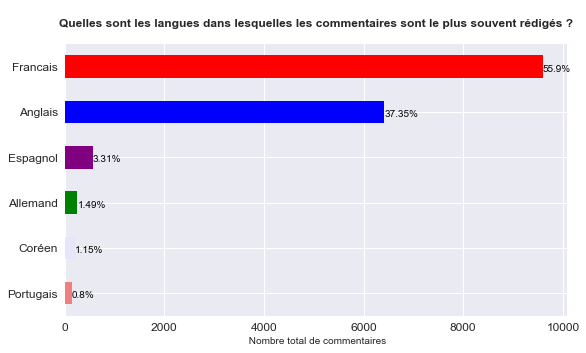

In [35]:
# Visualisation des langues 

ax = df.language.value_counts().head(6).plot(kind='barh', figsize=(9,5), color=['red', 'blue', 'purple', 'green', 'lavender',
                                            'lightcoral'],fontsize=12);

ax.set_title("\nQuelles sont les langues dans lesquelles les commentaires sont le plus souvent rédigés ?\n", 
             fontsize=12, fontweight='bold')
ax.set_xlabel(" Nombre total de commentaires", fontsize=10)
ax.set_yticklabels(['Francais', 'Anglais', 'Espagnol', 'Allemand', 'Coréen', 'Portugais'])

# créons une liste qui regroupe les données plt.patches 
totals = []
# trouvons les valeurs ind. et on les ajoute à la liste 
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

# on contruit les labels individuels avec la liste 
for i in ax.patches:
    ax.text(x=i.get_width(), y=i.get_y()+.35, 
            s=str(round((i.get_width()/total)*100, 2))+'%', 
            fontsize=10, color='black')

# on inverse pour mettre les plus grandes valeurs en haut 
ax.invert_yaxis()

In [37]:
# On splitte la base en deux dataframes, l'une en anglais et l'autre en français
df_en = df[(df['language']=='en')]
df_fr  = df[(df['language']=='fr')]

#### Quelques graphiques, sous forme de nuage de mots

In [39]:
#!pip install wordcloud

In [40]:
# import necessary libraries
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from PIL import Image

import re
import string

In [42]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DIAGNE\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [54]:
#  intégrer le graphique dans une fonction pour en faciliter l'accès

def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title('Commentaires en ' + language + '\n', fontsize=21, fontweight='bold')
    plt.show()

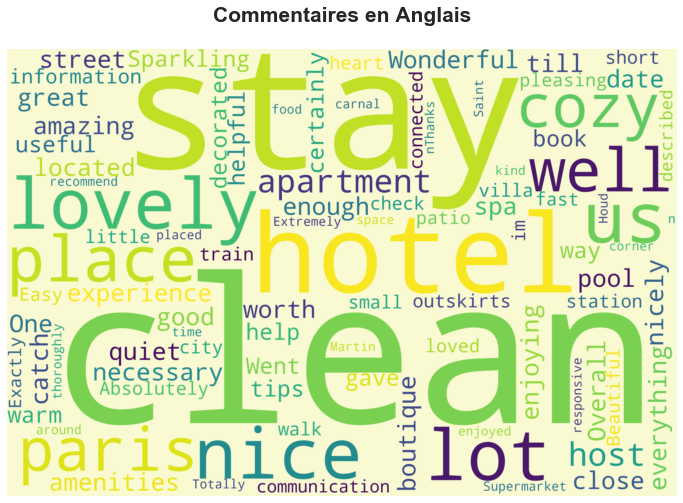

In [61]:
# anglais
wordcloud = WordCloud(max_font_size=None, max_words=200, background_color="lightgoldenrodyellow", 
                      width=3000, height=2000,
                      stopwords=stopwords.words('english')).generate(str(df_en.commentaires.values))

plot_wordcloud(wordcloud, 'Anglais')

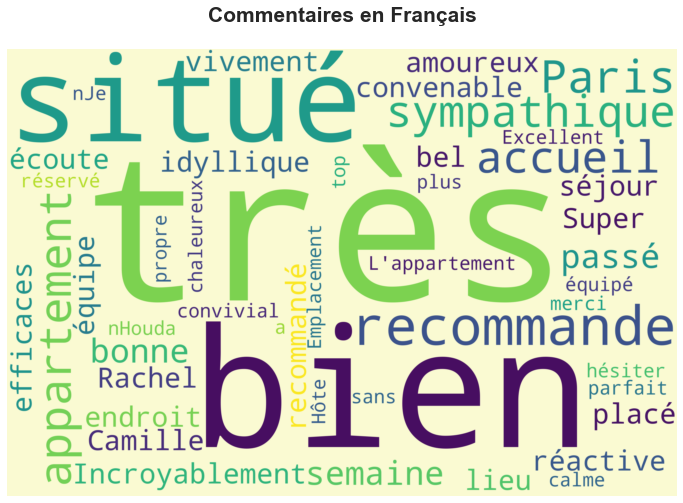

In [60]:
# français
wordcloud = WordCloud(max_font_size=None, max_words=150, background_color="lightgoldenrodyellow",
                      #width=1600, height=800,
                      width=3000, height=2000,
                      stopwords=stopwords.words('french')).generate(str(df_fr.commentaires.values))

plot_wordcloud(wordcloud, 'Français')

### Analyse de texte